In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as psql

In [2]:
parent_path = os.path.join(r"C:\Users\Parth\Desktop\PyProjects\AirBnB_project\Data", 'Interim', 'processed_V1.csv')

In [3]:
df = pd.read_csv(parent_path)

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'location',
       'last_review_year'],
      dtype='object')

In [5]:
# Analysing name, host_id and host_name

In [6]:
# queries : 
query1 = "this query should let us know, how many unique name is there"
query2 = "this query should let us know, how many unique host_id is there"
query3 = "this query should let us know, how many unique host_name is there"
query4 = "this query should let us know, how many name is there which has multiple host_id"
query5 = "this query should let us know, how many host_ids are there with multiple host_names"
query6 = "how many host_names are there with multiple host_ids"

In [7]:
query1 = "select count(distinct(name)) from df"

In [8]:
pysqldf = psql.sqldf

In [9]:
result1 = pysqldf(query1, {'df': df})

In [10]:
result1

,count(distinct(name))
0,5423


In [11]:
query2 = "select count(distinct(host_id)) from df"

In [12]:
query3 = "select count(distinct(host_name)) from df"

In [13]:
query4 = "select host_id, count(host_id) as hst_count from df group by host_id having hst_count > 1"

In [14]:
query5 = "select distinct(host_id), count(host_name) as hst_names from df group by host_name having hst_names > 1 order by hst_names desc"

In [15]:
result4 = pysqldf(query4, {'df': df})

In [16]:
result4

,host_id,hst_count
0,23,3
1,5146,2
2,12409,2
3,16872,3
4,29811,5
...,...,...
1736,534388950,5
1737,534510940,5
1738,534892321,2
1739,535521679,2


In [17]:
result5 = pysqldf(query5, {'df':df})

In [18]:
result5

,host_id,hst_names
0,1488733,210
1,56488,136
2,107434423,136
3,8167447,131
4,5615582,127
...,...,...
1485,45676991,2
1486,50779306,2
1487,269994846,2
1488,141834126,2


In [19]:
query7 = "select distinct(host_id), count(distinct(host_name)) as hst_unique_names from df group by host_name having hst_unique_names > 1 order by hst_unique_names desc"

In [20]:
result7 = pysqldf(query7, {'df': df})

In [21]:
result7

,host_id,hst_unique_names


In [22]:
z = df[df['host_id']==1488733]

In [23]:
z.drop_duplicates(['host_id', 'host_name'])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location,last_review_year
145,367356,Cottage in Austin · ★4.75 · 2 bedrooms · 3 bed...,1488733,Vacasa Texas,NaN,78751,30.3065,-97.72278,Entire home/apt,140,1,179,2022-11-06,1.28,15,360,1,NaN,"(-97.72278, 30.3065)",2022.0


In [24]:
for k, v in df.groupby('host_name'):
    if v['host_id'].nunique() > 1:
        print(k, v['host_id'].nunique())

Aaron 12
Abby 10
Abel 4
Abigail 5
Abraham 4
Adam 38
Adan 3
Adela 2
Adolfo 2
Adrian 4
Adriana 6
Adrienne 3
Ahmed 2
Aimee 2
Ainslie 2
Aj 6
Alain 2
Alaina 2
Alan 7
Alana 3
Albert 4
Alberto 2
Alec 4
Alejandra 3
Alejandro 6
Alex 43
Alexa 6
Alexander 12
Alexandra 11
Alexis 7
Ali 5
Alice 13
Alicia 9
Alisha 2
Alison 9
Allie 2
Allison 14
Ally 6
Allyson 2
Alyse 2
Alyson 2
Alyssa 15
Amanda 43
Amber 10
Amelia 6
Ames - Austin Vacay 5
Amir 2
Amit 2
Amy 31
Ana 7
Anastasia 2
Andi 2
Andre 2
Andrea 23
Andres 3
Andrew 37
Andy 12
Angel 3
Angela 15
Angelica 2
Angie 2
Anita 5
Ann 13
Anna 26
Anne 7
Anne-Marie 2
Annie 5
Annika 2
Anthony 12
Antonio 6
Anya 2
April 5
Ari 2
Ariana 2
Ariel 2
Arielle 2
Arnold 3
Arthur 5
Arvind 2
Ash 2
Asher 2
Ashley 45
Ashton 4
Audrey 8
Augustine 2
Austin 24
Austin - Austin Vacay 3
Autumn 2
Ava 5
Avery 4
Bailey 4
Barbara 8
Barbra 2
Barrett 2
Bart 2
Basil 2
Beatrice 2
Beau 4
Becca 2
Becky 4
Belen 2
Belinda 5
Belle 2
Ben 29
Benjamin 13
Bernard 2
Beth 7
Bethany 3
Betty 4
Beverly 3
Bia

In [25]:
df['location']

0                           (-97.73441, 30.26057)
1                           (-97.78422, 30.45697)
2                           (-97.73587, 30.24885)
3                           (-97.76487, 30.26034)
4                           (-97.73682, 30.23466)
                           ...                   
14856      (-97.6717638877004, 30.26138956143516)
14857                       (-97.68867, 30.30673)
14858       (-97.689086542809, 30.25848485658432)
14859                   (-97.6541116, 30.3170397)
14860    (-97.76494041135744, 30.132159387763625)
Name: location, Length: 14861, dtype: object

In [26]:
df['longitude']

0       -97.734410
1       -97.784220
2       -97.735870
3       -97.764870
4       -97.736820
           ...    
14856   -97.671764
14857   -97.688670
14858   -97.689087
14859   -97.654112
14860   -97.764940
Name: longitude, Length: 14861, dtype: float64

In [27]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Calculate the distance in kilometers
    distance = R * c

    return distance

# Coordinates of the first point
lat1 = 30.26057
lon1 = -97.73441

# Coordinates of the second point (replace these with your actual coordinates)
lat2 = 30.45697
lon2 = -97.78422

# Calculate the distance
distance = haversine(lat1, lon1, lat2, lon2)
print(f"The distance in kilometers is: {distance} km")


The distance in kilometers is: 22.355498974583654 km


In [28]:
df.groupby('neighbourhood').longitude.max(),  df.groupby('neighbourhood').longitude.min()  

(neighbourhood
 78701   -97.734110
 78702   -97.692880
 78703   -97.749752
 78704   -97.735320
 78705   -97.720800
 78712   -97.727280
 78717   -97.723200
 78719   -97.641850
 78721   -97.673940
 78722   -97.704728
 78723   -97.662712
 78724   -97.571490
 78725   -97.559300
 78726   -97.818943
 78727   -97.678154
 78728   -97.667430
 78729   -97.742640
 78730   -97.794780
 78731   -97.746070
 78732   -97.869140
 78733   -97.841970
 78734   -97.910650
 78735   -97.804470
 78736   -97.882650
 78737   -97.893950
 78738   -97.917300
 78739   -97.852200
 78741   -97.689430
 78742   -97.671110
 78744   -97.686371
 78745   -97.754200
 78746   -97.768300
 78747   -97.696060
 78748   -97.787420
 78749   -97.823270
 78750   -97.772930
 78751   -97.708890
 78752   -97.681190
 78753   -97.646680
 78754   -97.608800
 78756   -97.727000
 78757   -97.714670
 78758   -97.681589
 78759   -97.708753
 Name: longitude, dtype: float64,
 neighbourhood
 78701   -97.751874
 78702   -97.736800
 78703   -97.783

In [29]:
# neighborhood_group    max_longitude   max_long_lat    min_longitude      min_long_lat

# d1



# neighborhood_group    max_latitude   max_lat_long    min_longitude      min_long_lat

# d2



# neighborhood_group   d1   d2     approx area

In [30]:
NBH_longitudes = pd.DataFrame({'Neighbourhood': [i for i in df['neighbourhood'].unique()], 
                               'Max_longitudes': [i for i in df.groupby('neighbourhood').longitude.max()], 
                               'Min_longitudes': [i for i in df.groupby('neighbourhood').longitude.min()]})

NBH_longitudes.shape[0]

44

In [31]:
df.loc[df['longitude']== -97.734110, ['longitude', 'latitude']]

,longitude,latitude
509,-97.73411,30.26966
6640,-97.73411,30.25469
7193,-97.73411,30.30233
8909,-97.73411,30.29200


In [32]:
f1_max_long_lats = df.groupby('neighbourhood')[['longitude', 'latitude']].max()
f1_max_long_lats = f1_max_long_lats.reset_index()
f2_min_long_lats = df.groupby('neighbourhood')[['longitude', 'latitude']].min()
f2_min_long_lats = f2_min_long_lats.reset_index()
f3_max_lat_longs = df.groupby('neighbourhood')[['latitude', 'longitude']].max()
f3_max_lat_longs = f3_max_lat_longs.reset_index()
f4_min_lat_longs = df.groupby('neighbourhood')[['latitude', 'longitude']].min()
f4_min_lat_longs = f4_min_lat_longs.reset_index()

In [33]:
print(f1_max_long_lats.head(1))
print(f3_max_lat_longs.head(1))

   neighbourhood  longitude   latitude
0          78701  -97.73411  30.283717
   neighbourhood   latitude  longitude
0          78701  30.283717  -97.73411


In [34]:
merged_f1_f2 = pd.merge(f1_max_long_lats, f2_min_long_lats, on = 'neighbourhood', how = 'inner', suffixes = ['_max_long', '_min_long'])

In [35]:
merged_f3_f4 = pd.merge(f3_max_lat_longs, f4_min_lat_longs, on = 'neighbourhood', how = 'inner', suffixes = ['_max_lat', '_min_lat'])

In [36]:
merged_f1_f2.columns

Index(['neighbourhood', 'longitude_max_long', 'latitude_max_long',
       'longitude_min_long', 'latitude_min_long'],
      dtype='object')

In [37]:
# haversine(lat1, lon1, lat2, lon2)
merged_f1_f2['distance'] = merged_f1_f2.apply(lambda x : haversine(x['latitude_max_long'], x['longitude_max_long'], x['latitude_min_long'], x['longitude_min_long']), axis = 1)

In [38]:
merged_f3_f4.columns

Index(['neighbourhood', 'latitude_max_lat', 'longitude_max_lat',
       'latitude_min_lat', 'longitude_min_lat'],
      dtype='object')

In [39]:
merged_f3_f4['distance'] = merged_f3_f4.apply(lambda x : haversine(x['latitude_max_lat'], x['longitude_max_lat'], x['latitude_min_lat'], x['longitude_min_lat']), axis = 1)

In [40]:
approx_area = pd.merge(merged_f1_f2[['neighbourhood', 'distance']], merged_f3_f4[['neighbourhood', 'distance']], on = 'neighbourhood', how = 'inner', suffixes = ['_1', '_2'])

In [41]:
approx_area

,neighbourhood,distance_1,distance_2
0,78701,3.799959,3.799959
1,78702,5.591481,5.591481
2,78703,6.014947,6.014947
3,78704,7.291558,7.291558
4,78705,3.868090,3.868090
5,78712,0.643326,0.643326
6,78717,8.863083,8.863083
7,78719,12.021775,12.021775
8,78721,4.383979,4.383979
9,78722,3.658298,3.658298


In [42]:
approx_area['approx_area'] = approx_area.apply(lambda x: x['distance_1'] * x['distance_2'], axis = 1)

In [43]:
approx_area

,neighbourhood,distance_1,distance_2,approx_area
0,78701,3.799959,3.799959,14.439691
1,78702,5.591481,5.591481,31.264655
2,78703,6.014947,6.014947,36.179582
3,78704,7.291558,7.291558,53.166820
4,78705,3.868090,3.868090,14.962119
5,78712,0.643326,0.643326,0.413869
6,78717,8.863083,8.863083,78.554233
7,78719,12.021775,12.021775,144.523086
8,78721,4.383979,4.383979,19.219274
9,78722,3.658298,3.658298,13.383145


In [44]:
approx_area.drop('distance_2', axis = 1)

,neighbourhood,distance_1,approx_area
0,78701,3.799959,14.439691
1,78702,5.591481,31.264655
2,78703,6.014947,36.179582
3,78704,7.291558,53.166820
4,78705,3.868090,14.962119
5,78712,0.643326,0.413869
6,78717,8.863083,78.554233
7,78719,12.021775,144.523086
8,78721,4.383979,19.219274
9,78722,3.658298,13.383145


In [45]:
a = df[['longitude', 'latitude']]
a1 = a[a['longitude']==-97.734110]
z = a1.groupby('longitude').latitude.max()
z

longitude
-97.73411    30.30233
Name: latitude, dtype: float64

In [46]:
### functions to get Max_long_lats, Min_long_lats, Max_lat_longs and Min_lat_longs

In [47]:
def longitude_cords_max(data, pins):
    k = df.groupby(pins).longitude.max()
    q = df[df['longitude'].isin(k)]
    max_long_lats = q.groupby('longitude').latitude.max()
    return max_long_lats

longitude_cords_max(df, 'neighbourhood')

longitude
-97.917300    30.409130
-97.910650    30.404800
-97.893950    30.220880
-97.882650    30.237490
-97.869140    30.352520
-97.852200    30.145480
-97.841970    30.312830
-97.823270    30.231330
-97.818943    30.449891
-97.804470    30.236590
-97.794780    30.359060
-97.787420    30.177760
-97.772930    30.433540
-97.768300    30.267280
-97.754200    30.272830
-97.749752    30.299163
-97.746070    30.321170
-97.742640    30.443970
-97.735320    30.302590
-97.734110    30.302330
-97.727280    30.286660
-97.727000    30.325690
-97.723200    30.486370
-97.720800    30.293370
-97.714670    30.344480
-97.708890    30.318270
-97.708753    30.414885
-97.704728    30.283464
-97.696060    30.285530
-97.692880    30.252300
-97.689430    30.225200
-97.686371    30.213621
-97.681589    30.405889
-97.681190    30.327840
-97.678154    30.424011
-97.673940    30.263680
-97.671110    30.226210
-97.667430    30.448150
-97.662712    30.306788
-97.646680    30.391960
-97.641850    30.078440
-97.60

In [48]:
def longitude_cords_min(data, pins):
    k = df.groupby(pins).longitude.min()
    q = df[df['longitude'].isin(k)]
    min_long_lats = q.groupby('longitude').latitude.min()
    return min_long_lats

longitude_cords_min(df, 'neighbourhood')

longitude
-98.053350    30.290060
-98.025299    30.245171
-98.025040    30.227760
-97.999860    30.368690
-97.929440    30.328160
-97.925360    30.188260
-97.902210    30.259050
-97.893050    30.220630
-97.882890    30.337113
-97.872490    30.432090
-97.865850    30.309750
-97.861100    30.356183
-97.855360    30.150270
-97.841448    30.195987
-97.818690    30.458050
-97.800210    30.491170
-97.795370    30.138470
-97.793710    30.252890
-97.792620    30.352650
-97.790630    30.457110
-97.789080    30.343330
-97.784740    30.163300
-97.783470    30.297320
-97.752580    30.244046
-97.752340    30.438500
-97.751874    30.266822
-97.748988    30.349154
-97.748886    30.320000
-97.745820    30.219730
-97.736940    30.303610
-97.736800    30.241660
-97.733980    30.286640
-97.730339    30.376495
-97.728516    30.278590
-97.721700    30.329430
-97.713610    30.286230
-97.709750    30.266690
-97.702706    30.346728
-97.701953    30.281329
-97.695060    30.114830
-97.689740    30.243870
-97.67

In [49]:
def latitude_cords_min(data, pins):
    k = df.groupby(pins).latitude.min()
    q = df[df['latitude'].isin(k)]
    min_lat_longs = q.groupby('latitude').longitude.min()
    return min_lat_longs

longitude_cords_min(df, 'neighbourhood')

longitude
-98.053350    30.290060
-98.025299    30.245171
-98.025040    30.227760
-97.999860    30.368690
-97.929440    30.328160
-97.925360    30.188260
-97.902210    30.259050
-97.893050    30.220630
-97.882890    30.337113
-97.872490    30.432090
-97.865850    30.309750
-97.861100    30.356183
-97.855360    30.150270
-97.841448    30.195987
-97.818690    30.458050
-97.800210    30.491170
-97.795370    30.138470
-97.793710    30.252890
-97.792620    30.352650
-97.790630    30.457110
-97.789080    30.343330
-97.784740    30.163300
-97.783470    30.297320
-97.752580    30.244046
-97.752340    30.438500
-97.751874    30.266822
-97.748988    30.349154
-97.748886    30.320000
-97.745820    30.219730
-97.736940    30.303610
-97.736800    30.241660
-97.733980    30.286640
-97.730339    30.376495
-97.728516    30.278590
-97.721700    30.329430
-97.713610    30.286230
-97.709750    30.266690
-97.702706    30.346728
-97.701953    30.281329
-97.695060    30.114830
-97.689740    30.243870
-97.67

In [50]:
def latitude_cords_max(data, pins):
    k = df.groupby(pins).latitude.max()
    q = df[df['latitude'].isin(k)]
    max_lat_longs = q.groupby('latitude').longitude.max()
    return max_lat_longs

longitude_cords_min(df, 'neighbourhood')

longitude
-98.053350    30.290060
-98.025299    30.245171
-98.025040    30.227760
-97.999860    30.368690
-97.929440    30.328160
-97.925360    30.188260
-97.902210    30.259050
-97.893050    30.220630
-97.882890    30.337113
-97.872490    30.432090
-97.865850    30.309750
-97.861100    30.356183
-97.855360    30.150270
-97.841448    30.195987
-97.818690    30.458050
-97.800210    30.491170
-97.795370    30.138470
-97.793710    30.252890
-97.792620    30.352650
-97.790630    30.457110
-97.789080    30.343330
-97.784740    30.163300
-97.783470    30.297320
-97.752580    30.244046
-97.752340    30.438500
-97.751874    30.266822
-97.748988    30.349154
-97.748886    30.320000
-97.745820    30.219730
-97.736940    30.303610
-97.736800    30.241660
-97.733980    30.286640
-97.730339    30.376495
-97.728516    30.278590
-97.721700    30.329430
-97.713610    30.286230
-97.709750    30.266690
-97.702706    30.346728
-97.701953    30.281329
-97.695060    30.114830
-97.689740    30.243870
-97.67

In [51]:
NBH_latitudes = pd.DataFrame({'Neighbourhood': [i for i in df['neighbourhood'].unique()], 
                               'Max_latitudes': [i for i in df.groupby('neighbourhood').latitude.max()], 
                               'Min_latitudes': [i for i in df.groupby('neighbourhood').latitude.min()]})

NBH_latitudes.iloc[:3]

,Neighbourhood,Max_latitudes,Min_latitudes
0,78702,30.283717,30.25318
1,78729,30.282090,30.24908
2,78704,30.312670,30.26708


In [52]:
type(NBH_longitudes['Max_longitudes'][0])

numpy.float64

In [53]:
k = NBH_longitudes['Max_longitudes'][0].astype(float)
k

-97.73411

In [54]:
import ast
location_tupled = []

for i in df['location']:
    location_tuple = ast.literal_eval(i) 
    location_tupled.append(location_tuple)

In [55]:
type(location_tupled[0][0])

float

In [56]:
location_tupled[0]

(-97.73441, 30.26057)

In [ ]:
max_long_lats = longitude_cords_max(df, 'neighbourhood')
min_long_lats = longitude_cords_min(df, 'neighbourhood')
max_lat_longs = latitude_cords_max(df, 'neighbourhood')
min_lat_longs = latitude_cords_min(df, 'neighbourhood')

In [ ]:
# get the coordinates for d1
# haversine(lat1, lon1, lat2, lon2)
s1 = [(i,j) for i in max_long_lats.index for j in max_long_lats]
s2 = [(i,j) for i in min_long_lats.index for j in min_long_lats]
s3 = [(i,j) for i in max_lat_longs.index for j in max_lat_longs]
s4 = [(i,j) for i in min_lat_longs.index for j in min_lat_longs]



In [ ]:
k = [78702]
k1 = ['True' if df['neighbourhood'].isin(k).any() else 'False']
k1

In [ ]:
df = pd.merge(df, approx_area, on = 'neighbourhood', how = 'left')

In [ ]:
df[['number_of_reviews', 'last_review', 'reviews_per_month', 'number_of_reviews_ltm']]

In [60]:
import numpy as np

In [ ]:
df[(df['last_review']==np.nan) & (df['reviews_per_month']!=np.nan)]

<AxesSubplot: >

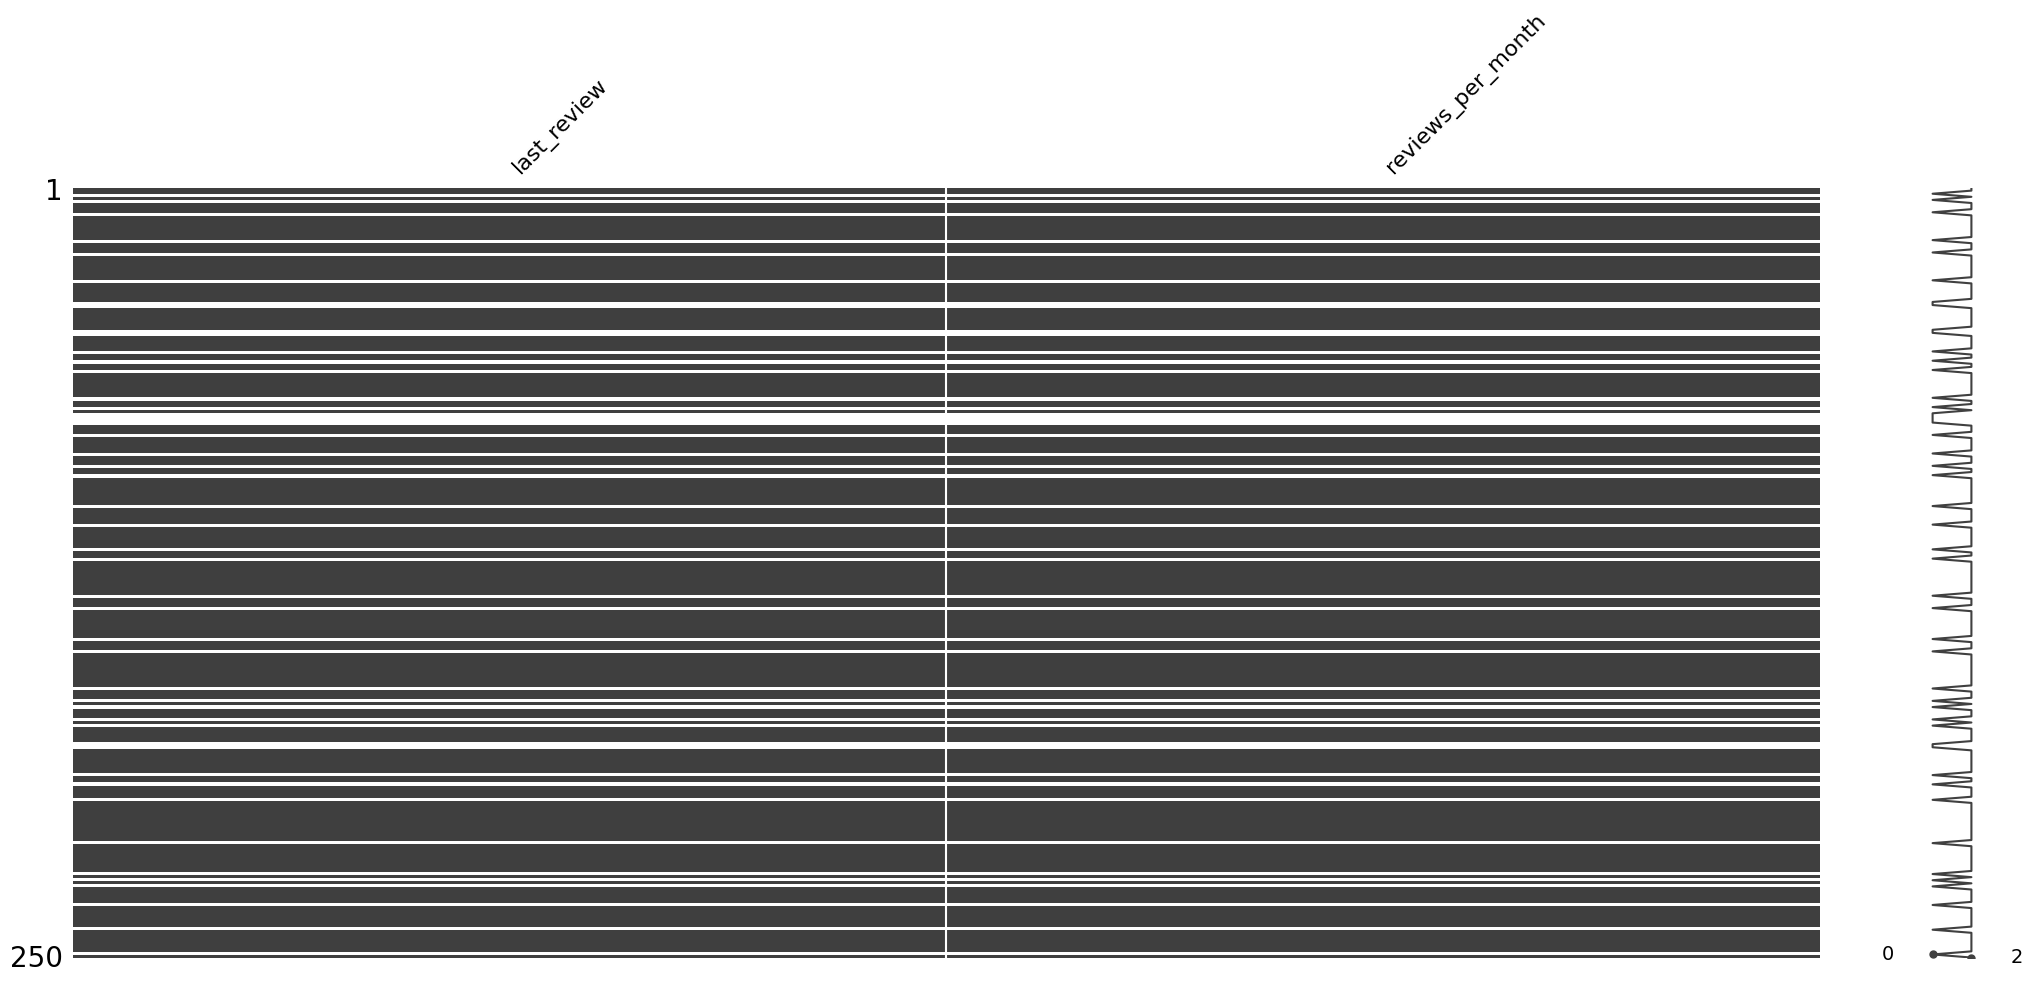

In [58]:
import missingno as msno
%matplotlib inline
msno.matrix(df[['last_review', 'reviews_per_month']].sample(250))

In [63]:
df.loc[(df['last_review']==np.nan) & (df['reviews_per_month']==np.nan)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location,last_review_year


In [64]:
df.shape

(14861, 20)

In [70]:
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,location,last_review_year
26,77347,Home in Austin · 1 bedroom · 1 bed · 1 private...,382265,Leslie,NaN,78733,30.338770,-97.882000,Private room,104,2,0,NaN,NaN,1,365,0,NaN,"(-97.882, 30.33877)",NaN
96,331549,Place to stay in Austin · 1 bedroom · 1 bed · ...,1690383,Sandra,NaN,78725,30.239110,-97.586250,Private room,100,2,0,NaN,NaN,1,0,0,NaN,"(-97.58625, 30.23911)",NaN
121,351865,Home in Austin · 1 bedroom · 1 bed · 1 bath,1782559,Julie,NaN,78754,30.333450,-97.649370,Private room,75,1,0,NaN,NaN,1,0,0,NaN,"(-97.64937, 30.33345)",NaN
129,355328,Home in Austin · 1 bedroom · 1 bed · 1 bath,1798834,Joan,NaN,78704,30.239280,-97.779070,Entire home/apt,100,1,0,NaN,NaN,1,0,0,NaN,"(-97.77907, 30.23928)",NaN
136,358643,Home in Austin · 2 bedrooms · 1 bed · 0 baths,1815367,Kathy,NaN,78704,30.229710,-97.766950,Entire home/apt,800,1,0,NaN,NaN,1,0,0,NaN,"(-97.76695, 30.22971)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14856,976379518756852126,Home in Austin · ★New · 1 bedroom · 1 bed · 1 ...,292849645,Rami,NaN,78725,30.261390,-97.671764,Private room,50,1,0,NaN,NaN,5,269,0,NaN,"(-97.6717638877004, 30.26138956143516)",NaN
14857,976810489807743834,Home in Austin · ★New · 4 bedrooms · 4 beds · ...,272515104,Ames - Austin Vacay,NaN,78723,30.306730,-97.688670,Entire home/apt,157,1,0,NaN,NaN,6,365,0,NaN,"(-97.68867, 30.30673)",NaN
14858,976819043910196489,Home in Austin · ★New · 3 bedrooms · 4 beds · ...,387932846,Barclé Group,NaN,78721,30.258485,-97.689087,Entire home/apt,117,1,0,NaN,NaN,19,176,0,NaN,"(-97.689086542809, 30.25848485658432)",NaN
14859,976821657557908773,Home in Austin · ★New · 3 bedrooms · 3 beds · ...,536308631,Carl,NaN,78724,30.317040,-97.654112,Entire home/apt,133,2,0,NaN,NaN,1,268,0,NaN,"(-97.6541116, 30.3170397)",NaN


In [68]:
df['last_review'].isna().sum()

3103

In [71]:
np.nan==np.nan

False

In [72]:
np.nan is np.nan

True

In [76]:
a = [2]
b = [2]

In [77]:
a==b

True

In [78]:
a is b

False

In [80]:
df.loc[(df['last_review'].isna()) & (df['reviews_per_month'].isna()), 'number_of_reviews'].value_counts()

number_of_reviews
0    3103
Name: count, dtype: int64

In [82]:
# correlation(linear and non-linear), covariance, pd.crosstab

In [83]:
df[['minimum_nights', 'calculated_host_listings_count', 'availability_365']]

,minimum_nights,calculated_host_listings_count,availability_365
0,2,1,306
1,1,1,0
2,30,1,0
3,3,1,156
4,4,1,98
...,...,...,...
14856,1,5,269
14857,1,6,365
14858,1,19,176
14859,2,1,268


In [86]:
df['calculated_host_listings_count'].mean()

11.047641477693292

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def save_scatter_fig(df, x, y):
    plt.figure(figsize = (15, 7))
    fig = sns.scatterplot(x = df[x], y = df[y])
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.savefig(f'{x}_{y}.png')
    plt.show()

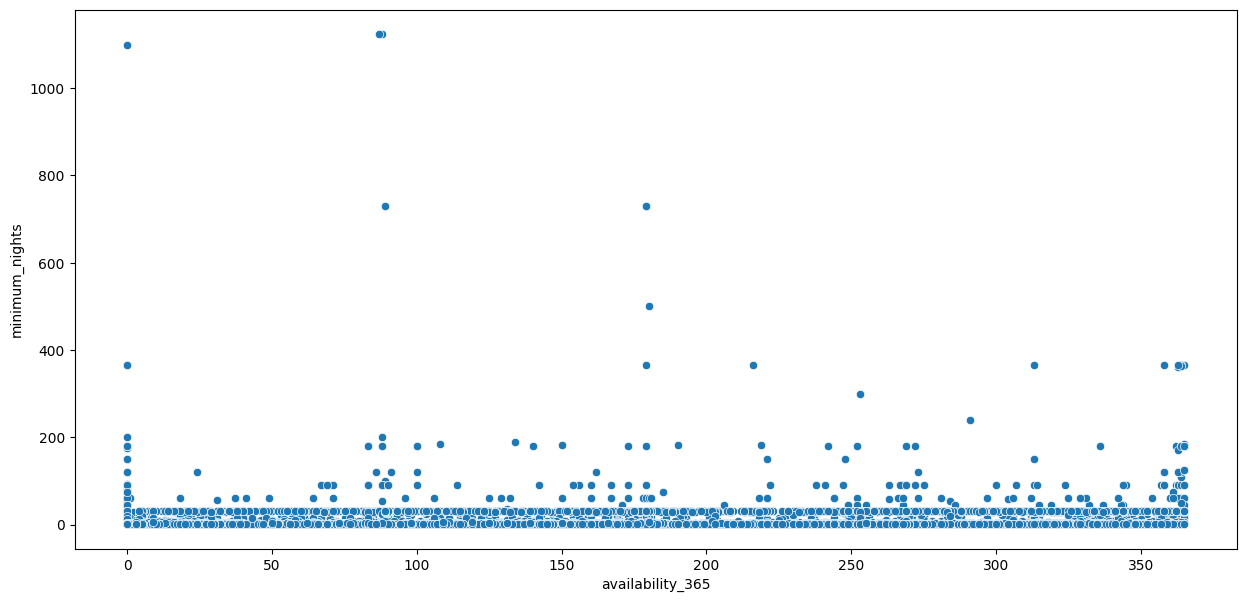

In [95]:
save_scatter_fig(df, 'availability_365', 'minimum_nights')

In [96]:
df[['minimum_nights', 'availability_365']].corr()

,minimum_nights,availability_365
minimum_nights,1.000000,0.059605
availability_365,0.059605,1.000000


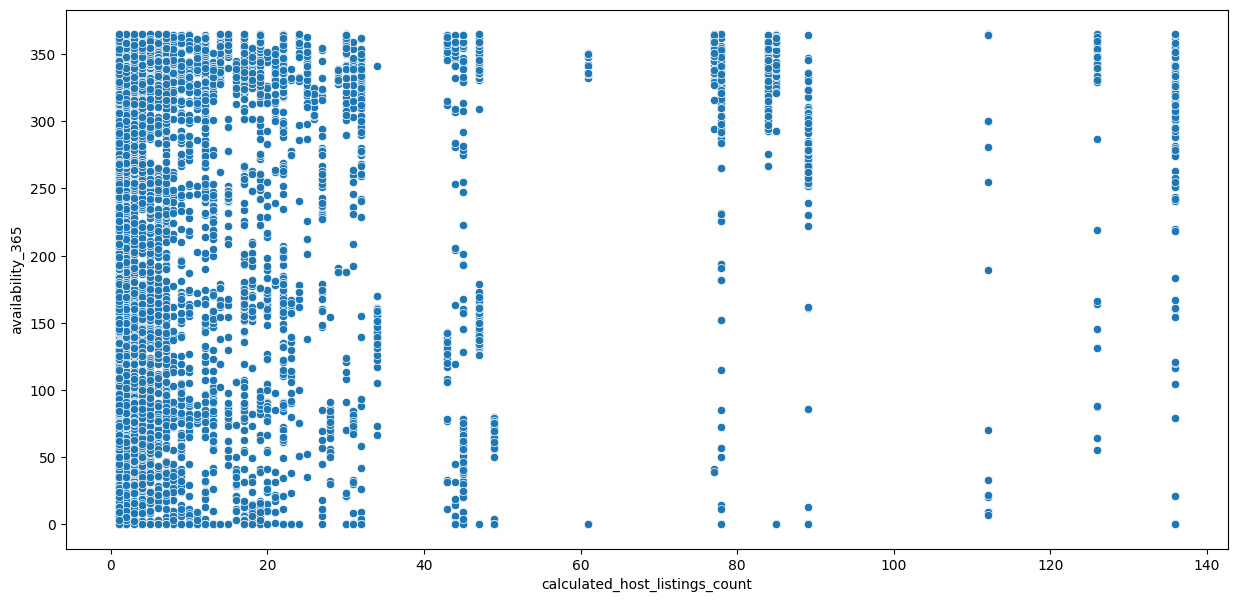

In [97]:
save_scatter_fig(df, 'calculated_host_listings_count', 'availability_365')

In [98]:
df[['availability_365', 'calculated_host_listings_count']].corr()

,availability_365,calculated_host_listings_count
availability_365,1.000000,0.313838
calculated_host_listings_count,0.313838,1.000000


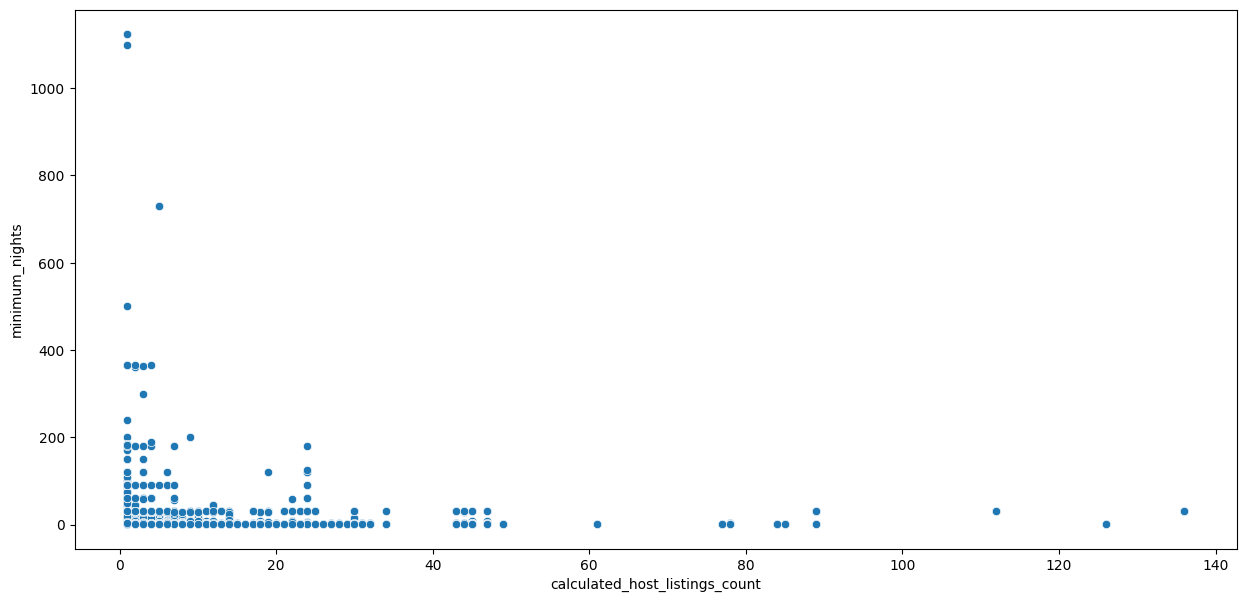

In [99]:
save_scatter_fig(df, 'calculated_host_listings_count', 'minimum_nights')

In [100]:
df[['calculated_host_listings_count', 'minimum_nights']].corr()

,calculated_host_listings_count,minimum_nights
calculated_host_listings_count,1.000000,0.040795
minimum_nights,0.040795,1.000000


In [101]:
df[['room_type', 'name']].head(0)

,room_type,name
0,Entire home/apt,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...
1,Private room,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...
2,Entire home/apt,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...
3,Entire home/apt,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...
4,Entire home/apt,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...


In [106]:
for i in df['name'].iloc[:1]:
    l = [i.split('·')]
    print(l)

[['Guesthouse in Austin ', ' ★4.84 ', ' 1 bedroom ', ' 2 beds ', ' 1 bath']]


In [109]:
df.iloc[0,1]

'Guesthouse in Austin · ★4.84 · 1 bedroom · 2 beds · 1 bath'

In [110]:
def name_splitter(val):
    k = val.split('·')
    return k

In [111]:
df['room_specs'] = df['name'].map(name_splitter)

In [113]:
val = df['room_specs'].tolist()

In [137]:
column_names = ['listings', 'ratings', 'bedrooms', 'beds', 'baths']

In [138]:
val1 = pd.DataFrame(val, columns = column_names)

In [139]:
# home type = before in, city = after in, remove star from col 1, remove beds from col 3, remove only bedrooms from 2, remove bath from col 4 and set shared bath as 0.5 

In [140]:
val1

,listings,ratings,bedrooms,beds,baths
0,Guesthouse in Austin,★4.84,1 bedroom,2 beds,1 bath
1,Home in Austin,★4.90,1 bedroom,1 bed,1 shared bath
2,Guesthouse in Austin,★4.97,Studio,1 bed,1 bath
3,Guesthouse in Austin,★4.97,1 bedroom,2 beds,1 bath
4,Guest suite in Austin,★4.56,1 bedroom,1 bed,1 bath
...,...,...,...,...,...
14856,Home in Austin,★New,1 bedroom,1 bed,1 bath
14857,Home in Austin,★New,4 bedrooms,4 beds,2 baths
14858,Home in Austin,★New,3 bedrooms,4 beds,2.5 baths
14859,Home in Austin,★New,3 bedrooms,3 beds,2 baths


In [141]:
val1.columns

Index(['listings', 'ratings', 'bedrooms', 'beds', 'baths'], dtype='object')

In [142]:
k1 = [i.split(' in ') for i in val1['listings']]
k1

[['Guesthouse', 'Austin '],
 ['Home', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Guest suite', 'Austin '],
 ['Home', 'Austin '],
 ['Bungalow', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Bungalow', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Condo', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Condo', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Townhouse', 'Austin '],
 ['Rental unit', 'Austin '],
 ['Home', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Guest suite', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Rental unit', 'Austin '],
 ['Guesthouse', 'Austin '],
 ['Bungalow', 'Austin '],
 ['Bungalow', 'Austin '],
 ['Home', 'Austin '],
 ['Home', 'Austin '],
 ['Condo', 'Austin '],
 ['Home', 'Austin '],
 [

In [144]:
val1['house_type'] = [i[0] for i in k1]
val1['house_type']

0         Guesthouse
1               Home
2         Guesthouse
3         Guesthouse
4        Guest suite
            ...     
14856           Home
14857           Home
14858           Home
14859           Home
14860           Home
Name: house_type, Length: 14861, dtype: object

In [145]:
val1['city'] = [i[1] for i in k1]
val1['city']

0        Austin 
1        Austin 
2        Austin 
3        Austin 
4        Austin 
          ...   
14856    Austin 
14857    Austin 
14858    Austin 
14859    Austin 
14860    Austin 
Name: city, Length: 14861, dtype: object

In [146]:
val1

,listings,ratings,bedrooms,beds,baths,house_type,city
0,Guesthouse in Austin,★4.84,1 bedroom,2 beds,1 bath,Guesthouse,Austin
1,Home in Austin,★4.90,1 bedroom,1 bed,1 shared bath,Home,Austin
2,Guesthouse in Austin,★4.97,Studio,1 bed,1 bath,Guesthouse,Austin
3,Guesthouse in Austin,★4.97,1 bedroom,2 beds,1 bath,Guesthouse,Austin
4,Guest suite in Austin,★4.56,1 bedroom,1 bed,1 bath,Guest suite,Austin
...,...,...,...,...,...,...,...
14856,Home in Austin,★New,1 bedroom,1 bed,1 bath,Home,Austin
14857,Home in Austin,★New,4 bedrooms,4 beds,2 baths,Home,Austin
14858,Home in Austin,★New,3 bedrooms,4 beds,2.5 baths,Home,Austin
14859,Home in Austin,★New,3 bedrooms,3 beds,2 baths,Home,Austin


In [157]:
val1['ratings'] = [i[2:] for i in val1['ratings']]
val1['ratings']

0        4.84 
1        4.90 
2        4.97 
3        4.97 
4        4.56 
         ...  
14856     New 
14857     New 
14858     New 
14859     New 
14860     New 
Name: ratings, Length: 14861, dtype: object

In [158]:
val1

,listings,ratings,bedrooms,beds,baths,house_type,city
0,Guesthouse in Austin,4.84,1 bedroom,2 beds,1 bath,Guesthouse,Austin
1,Home in Austin,4.90,1 bedroom,1 bed,1 shared bath,Home,Austin
2,Guesthouse in Austin,4.97,Studio,1 bed,1 bath,Guesthouse,Austin
3,Guesthouse in Austin,4.97,1 bedroom,2 beds,1 bath,Guesthouse,Austin
4,Guest suite in Austin,4.56,1 bedroom,1 bed,1 bath,Guest suite,Austin
...,...,...,...,...,...,...,...
14856,Home in Austin,New,1 bedroom,1 bed,1 bath,Home,Austin
14857,Home in Austin,New,4 bedrooms,4 beds,2 baths,Home,Austin
14858,Home in Austin,New,3 bedrooms,4 beds,2.5 baths,Home,Austin
14859,Home in Austin,New,3 bedrooms,3 beds,2 baths,Home,Austin


In [187]:
def stripper(i):
    i = i.replace(' ', '')
    if i[0].isnumeric():
        i = float(i[0])
    return i

In [188]:
val1['bedrooms'] = val1['bedrooms'].astype(str).map(stripper)

In [189]:
val1['bedrooms']

0           1.0
1           1.0
2        Studio
3           1.0
4           1.0
          ...  
14856       1.0
14857       4.0
14858       3.0
14859       3.0
14860       4.0
Name: bedrooms, Length: 14861, dtype: object

In [194]:
val1['beds'] = val1['beds'].astype(str).map(stripper)

In [195]:
val1['beds']

0        2.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
14856    1.0
14857    4.0
14858    4.0
14859    3.0
14860    3.0
Name: beds, Length: 14861, dtype: object

In [211]:
val1['baths'].shape[0]

14861

In [216]:
for i in val1['baths']:
    if type(i) == str:
        print(i)
    # print(i[0:4])

 1 bath
 1 shared bath
 1 bath
 1 bath
 1 bath
 2 baths
 2 baths
 1 bath
 1 bath
 1 bath
 1 bath
 2 baths
 1 shared bath
 1 bath
 1 bath
 1.5 baths
 1 bath
 1 bath
 1 bath
 2.5 baths
 2 baths
 1 bath
 1 bath
 1 bath
 3 baths
 2 baths
 1 bath
 3 baths
 1 bath
 1 bath
 1 private bath
 1 bath
 1 bath
 1 bath
 1 bath
 2 baths
 1 shared bath
 1 bath
 2 baths
 1 bath
 1 shared bath
 1 bath
 1 bath
 1.5 baths
 1 bath
 1 bath
 2 baths
 1 bath
 1 bath
 1 bath
 3 baths
 3 baths
 2 baths
 1.5 baths
 2.5 baths
 1 bath
 1 private bath
 1 bath
 1 bath
 2.5 baths
 1 bath
 1 private bath
 1 bath
 2 baths
 1 bath
 2.5 baths
 1 bath
 1 bath
 1 bath
 1 bath
 1.5 baths
 2 baths
 2 baths
 2.5 baths
 2.5 baths
 2.5 baths
 2 baths
 1 bath
 1 private bath
 1 bath
 3 baths
 1 bath
 3.5 baths
 2.5 baths
 2 baths
 1 bath
 2 baths
 1 bath
 2 baths
 1 shared bath
 3 baths
 1.5 baths
 2 baths
 1 bath
 2 baths
 1 bath
 1 shared bath
 1 bath
 1 private bath
 1 bath
 1 bath
 1 bath
 2 baths
 1 bath
 1 bath
 2.5 baths


In [240]:
import re

def bath_splitter(i):
    numeric = []
    pattern = r'(\d+\.\d+|\d+)'
    if 'shared' in i:
        k = 0.5
        return k
    matches = re.findall(pattern, i)
    for match in matches:
        numeric.append(match)
    return numeric

In [241]:
val1['baths'] = val1['baths'].astype(str).map(bath_splitter)

In [242]:
val1['baths']

0          [1]
1        [0.5]
2          [1]
3          [1]
4          [1]
         ...  
14856      [1]
14857      [2]
14858    [2.5]
14859      [2]
14860    [2.5]
Name: baths, Length: 14861, dtype: object

In [237]:
def list_remover(i):
    if type(i) == 'list':
        if len(i)>=1:
            return i[0]
        else:
            return i

In [238]:
k = val1['baths'].map(list_remover)

In [239]:
k

0        None
1        None
2        None
3        None
4        None
         ... 
14856    None
14857    None
14858    None
14859    None
14860    None
Name: baths, Length: 14861, dtype: object

In [243]:
val1.describe()

,listings,ratings,bedrooms,beds,baths,house_type,city
count,14861,14861,14861.0,14861.0,14861,14861,14861
unique,96,134,12.0,14.0,23,39,29
top,Home in Austin,5.0,1.0,1.0,[1],Home,Austin
freq,7132,2626,6024.0,6185.0,4913,7249,14649


In [250]:
val1.groupby('ratings').count()

,listings,bedrooms,beds,baths,house_type,city
ratings,,,,,,
bed,4,4,4,4,4,4
bedroom,1,1,1,1,1,1
bedroom,1988,1988,1988,1988,1988,1988
bedrooms,2037,2037,2037,2037,2037,2037
beds,1,1,1,1,1,1
...,...,...,...,...,...,...
4.98,232,232,232,232,232,232
4.99,124,124,124,124,124,124
5.0,2626,2626,2626,2626,2626,2626


In [252]:
val1['ratings'].value_counts()

ratings
5.0            2626
 bedrooms      2037
 bedroom       1988
New             922
4.95            313
               ... 
4.26              1
4 bedrooms        1
 beds             1
2.0               1
3 bedrooms        1
Name: count, Length: 134, dtype: int64

In [254]:
val1['baths']

0          [1]
1        [0.5]
2          [1]
3          [1]
4          [1]
         ...  
14856      [1]
14857      [2]
14858    [2.5]
14859      [2]
14860    [2.5]
Name: baths, Length: 14861, dtype: object

In [255]:
val1

,listings,ratings,bedrooms,beds,baths,house_type,city
0,Guesthouse in Austin,4.84,1.0,2.0,[1],Guesthouse,Austin
1,Home in Austin,4.90,1.0,1.0,[0.5],Home,Austin
2,Guesthouse in Austin,4.97,Studio,1.0,[1],Guesthouse,Austin
3,Guesthouse in Austin,4.97,1.0,2.0,[1],Guesthouse,Austin
4,Guest suite in Austin,4.56,1.0,1.0,[1],Guest suite,Austin
...,...,...,...,...,...,...,...
14856,Home in Austin,New,1.0,1.0,[1],Home,Austin
14857,Home in Austin,New,4.0,4.0,[2],Home,Austin
14858,Home in Austin,New,3.0,4.0,[2.5],Home,Austin
14859,Home in Austin,New,3.0,3.0,[2],Home,Austin


In [258]:
df['name'].map(len).value_counts()

name
53    1857
54    1690
58    1338
56    1035
55    1027
57    1006
50     890
59     810
46     721
52     671
51     627
60     555
61     491
48     468
45     290
47     277
43     202
44     185
49     178
65     118
66      85
62      75
63      73
64      57
42      48
67      20
40      11
68       9
41       8
39       6
72       6
36       6
37       4
35       3
71       3
38       3
73       2
34       2
69       2
31       1
26       1
Name: count, dtype: int64

In [260]:
df.loc[df['name'].map(len) == 53, 'name']

5        Home in Austin · ★5.0 · 2 bedrooms · 2 beds · ...
27       Home in Austin · ★4.68 · 2 bedrooms · 2 beds ·...
29       Home in Austin · ★4.20 · 5 bedrooms · 4 beds ·...
30       Home in Austin · ★4.86 · 3 bedrooms · 4 beds ·...
38       Condo in Austin · ★4.67 · 2 bedrooms · 1 bed ·...
                               ...                        
14807    Home in Austin · ★New · 3 bedrooms · 9 beds · ...
14818    Home in Austin · ★New · 3 bedrooms · 3 beds · ...
14834    Home in Austin · ★New · 2 bedrooms · 2 beds · ...
14857    Home in Austin · ★New · 4 bedrooms · 4 beds · ...
14859    Home in Austin · ★New · 3 bedrooms · 3 beds · ...
Name: name, Length: 1857, dtype: object

In [261]:
df.loc[df['name'].map(len) == 26, 'name']

321    Home in Austin · 1 bedroom
Name: name, dtype: object

In [263]:
def splits(i):
    k = i.split('·')
    d = {'home':k[0]}
    for elem in k[1:]:
        elem2 = elem.strip()
        if '★' in elem2:
            d['ratings'] = elem2
        elif 'bedroom' in elem2:
            d['bedrooms'] = elem2
        elif 'bed' in elem2:
            d['beds'] = elem2
        elif 'bath' in elem2:
            d['baths'] = elem2
    return d

In [265]:
z = df['name'].astype(str).map(splits)

In [272]:
z1 = z.tolist()

In [273]:
val2 = pd.DataFrame(z1)

In [274]:
val2

,home,ratings,bedrooms,beds,baths
0,Guesthouse in Austin,★4.84,1 bedroom,2 beds,1 bath
1,Home in Austin,★4.90,1 bedroom,1 bed,1 shared bath
2,Guesthouse in Austin,★4.97,NaN,1 bed,1 bath
3,Guesthouse in Austin,★4.97,1 bedroom,2 beds,1 bath
4,Guest suite in Austin,★4.56,1 bedroom,1 bed,1 bath
...,...,...,...,...,...
14856,Home in Austin,★New,1 bedroom,1 bed,1 bath
14857,Home in Austin,★New,4 bedrooms,4 beds,2 baths
14858,Home in Austin,★New,3 bedrooms,4 beds,2.5 baths
14859,Home in Austin,★New,3 bedrooms,3 beds,2 baths


In [275]:
k1 = [i.split(' in ') for i in val2['home']]

In [276]:
val2['house_type'] = [i[0] for i in k1]

In [277]:
val2['city'] = [i[1] for i in k1]

In [281]:
val2['ratings'] = [i[1:] for i in val2['ratings']]

TypeError: 'float' object is not subscriptable

In [283]:
val2['ratings'] = val2['ratings'].str[1:]

In [284]:
val2['ratings']

0        4.84
1        4.90
2        4.97
3        4.97
4        4.56
         ... 
14856     New
14857     New
14858     New
14859     New
14860     New
Name: ratings, Length: 14861, dtype: object

In [285]:
def stripper(i):
    i = i.replace(' ', '')
    if i[0].isnumeric():
        i = float(i[0])
    return i

In [ ]:
val2['bedrooms'] = val2['bedrooms'].astype(str).map(stripper)

In [286]:
type(np.nan)

float

In [287]:
val2['beds'] = val2['beds'].astype(str).map(stripper)

In [288]:
val2['beds']

0        2.0
1        1.0
2        1.0
3        2.0
4        1.0
        ... 
14856    1.0
14857    4.0
14858    4.0
14859    3.0
14860    3.0
Name: beds, Length: 14861, dtype: object

In [289]:
import re

def bath_splitter(i):
    numeric = []
    pattern = r'(\d+\.\d+|\d+)'
    if 'shared' in i:
        k = 0.5
        return k
    matches = re.findall(pattern, i)
    for match in matches:
        numeric.append(match)
    return numeric

In [290]:
val2['baths'] = val2['baths'].astype(str).map(bath_splitter)

In [291]:
val2['baths']

0          [1]
1          0.5
2          [1]
3          [1]
4          [1]
         ...  
14856      [1]
14857      [2]
14858    [2.5]
14859      [2]
14860    [2.5]
Name: baths, Length: 14861, dtype: object

In [292]:
val2

,home,ratings,bedrooms,beds,baths,house_type,city
0,Guesthouse in Austin,4.84,1 bedroom,2.0,[1],Guesthouse,Austin
1,Home in Austin,4.90,1 bedroom,1.0,0.5,Home,Austin
2,Guesthouse in Austin,4.97,NaN,1.0,[1],Guesthouse,Austin
3,Guesthouse in Austin,4.97,1 bedroom,2.0,[1],Guesthouse,Austin
4,Guest suite in Austin,4.56,1 bedroom,1.0,[1],Guest suite,Austin
...,...,...,...,...,...,...,...
14856,Home in Austin,New,1 bedroom,1.0,[1],Home,Austin
14857,Home in Austin,New,4 bedrooms,4.0,[2],Home,Austin
14858,Home in Austin,New,3 bedrooms,4.0,[2.5],Home,Austin
14859,Home in Austin,New,3 bedrooms,3.0,[2],Home,Austin


In [297]:
val2.to_csv('name_col_df.csv', index = False)

In [298]:
name_df = pd.read_csv('name_col_df.csv')

In [299]:
name_df

,home,ratings,bedrooms,beds,baths,house_type,city
0,Guesthouse in Austin,4.84,1 bedroom,2.0,['1'],Guesthouse,Austin
1,Home in Austin,4.90,1 bedroom,1.0,0.5,Home,Austin
2,Guesthouse in Austin,4.97,NaN,1.0,['1'],Guesthouse,Austin
3,Guesthouse in Austin,4.97,1 bedroom,2.0,['1'],Guesthouse,Austin
4,Guest suite in Austin,4.56,1 bedroom,1.0,['1'],Guest suite,Austin
...,...,...,...,...,...,...,...
14856,Home in Austin,New,1 bedroom,1.0,['1'],Home,Austin
14857,Home in Austin,New,4 bedrooms,4.0,['2'],Home,Austin
14858,Home in Austin,New,3 bedrooms,4.0,['2.5'],Home,Austin
14859,Home in Austin,New,3 bedrooms,3.0,['2'],Home,Austin


In [300]:
def clean(i):
    var = ['[', ']', "'"]
    for item in var:
        i = i.replace(item, '')
    return i

In [301]:
name_df['baths'] = name_df['baths'].astype(str).map(clean)

In [304]:
name_df['baths']

0          1
1        0.5
2          1
3          1
4          1
        ... 
14856      1
14857      2
14858    2.5
14859      2
14860    2.5
Name: baths, Length: 14861, dtype: object

In [303]:
name_df['baths'] = name['baths'].astype()

ValueError: could not convert string to float: ''

In [306]:
pd.to_numeric(name_df['baths'], errors = 'coerce')

0        1.0
1        0.5
2        1.0
3        1.0
4        1.0
        ... 
14856    1.0
14857    2.0
14858    2.5
14859    2.0
14860    2.5
Name: baths, Length: 14861, dtype: float64

In [307]:
name_df

,home,ratings,bedrooms,beds,baths,house_type,city
0,Guesthouse in Austin,4.84,1 bedroom,2.0,1,Guesthouse,Austin
1,Home in Austin,4.90,1 bedroom,1.0,0.5,Home,Austin
2,Guesthouse in Austin,4.97,NaN,1.0,1,Guesthouse,Austin
3,Guesthouse in Austin,4.97,1 bedroom,2.0,1,Guesthouse,Austin
4,Guest suite in Austin,4.56,1 bedroom,1.0,1,Guest suite,Austin
...,...,...,...,...,...,...,...
14856,Home in Austin,New,1 bedroom,1.0,1,Home,Austin
14857,Home in Austin,New,4 bedrooms,4.0,2,Home,Austin
14858,Home in Austin,New,3 bedrooms,4.0,2.5,Home,Austin
14859,Home in Austin,New,3 bedrooms,3.0,2,Home,Austin


In [311]:
name_df['price'] = df['price']

In [312]:
parent_path = r'C:\Users\Parth\Desktop\PyProjects\AirBnB_project\Data'

In [313]:
name_df.to_csv(os.path.join(parent_path, 'Interim', 'processed_name_df.csv'), index = False)